# Pymaceuticals Inc.
---

### Analysis

- The tumor size decreased the longer the mouse took Capomulin
- The average weight of the mice increased as the tumor volume increased
 

In [62]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique = merge_df["Mouse ID"].nunique()
unique

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_ID = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicates_ID 


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates = duplicates[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
duplicates

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
909,g989,0,Propriva,Female,21,26,45.000000,0
911,g989,5,Propriva,Female,21,26,47.570392,0
913,g989,10,Propriva,Female,21,26,49.880528,0
915,g989,15,Propriva,Female,21,26,53.442020,0
917,g989,20,Propriva,Female,21,26,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df = clean_df[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique = len(clean_df["Mouse ID"].unique())
unique

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_Volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

#mean_Volume = np.mean((clean_df.groupby["Drug Regimen"])["Tumor Volume (mm3)"])
#mean_Volume = np.mean(tumor_Volume)
mean_Volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_Volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_Volume = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_Volume = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_Volume = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
#variance_Volume = np.var(tumor_Volume, ddof=0)

summary_df = pd.DataFrame({"Mean": mean_Volume,
                         "Median": median_Volume,
                         "Variance": variance_Volume,
                         "Standard Deviation": std_Volume,
                         "Standard Error of Mean": sem_Volume})
summary_df


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_single = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_single

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


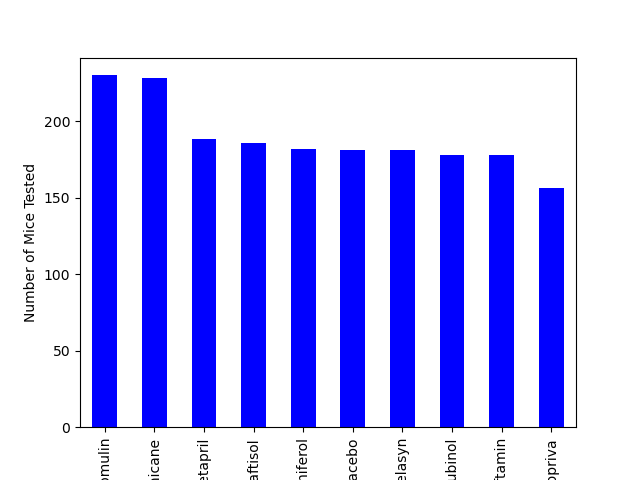

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_df["Drug Regimen"].value_counts()
timepoints.plot(kind="bar", facecolor="blue", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
plt.show()

<IPython.core.display.Javascript object>


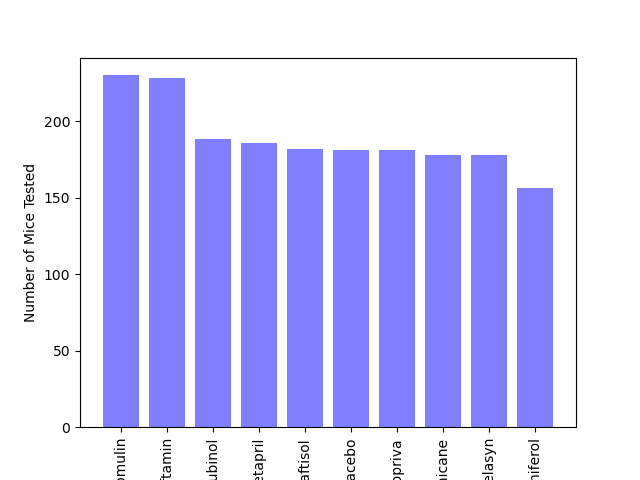

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = clean_df["Drug Regimen"].nunique()
x_axis = np.arange(0, drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
timepoints = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, timepoints, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.show()

<IPython.core.display.Javascript object>


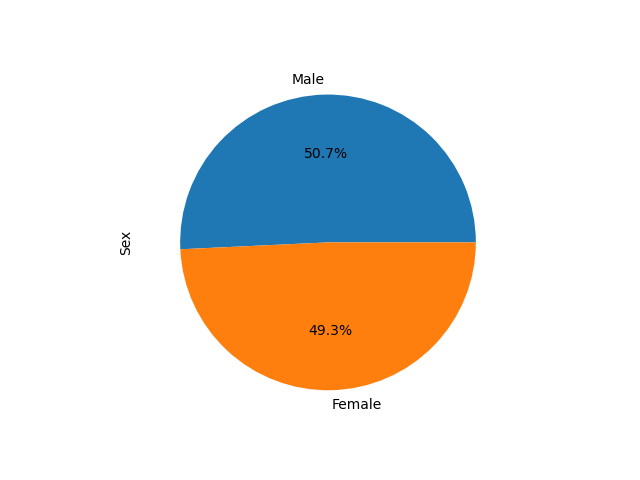

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].value_counts()
sex.plot(kind="pie", autopct="%1.1f%%")

plt.show()


<IPython.core.display.Javascript object>


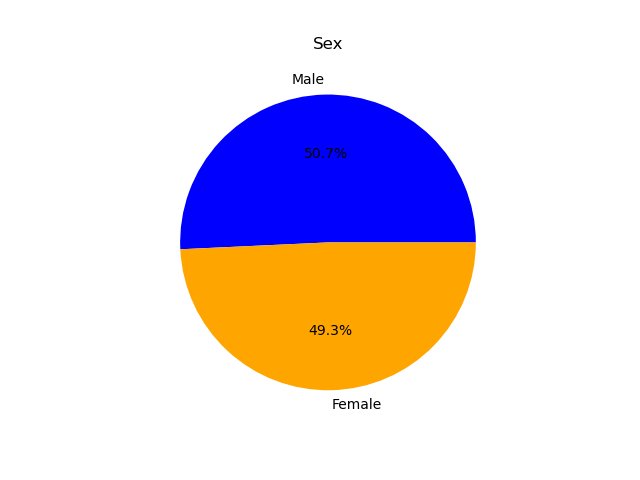

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (clean_df["Sex"] == "Male").sum()
female = (clean_df["Sex"] == "Female").sum()
labels = ["Male", "Female"]
sizes = [male, female]
colors = ["blue", "orange"]
plt.title("Sex")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
#mouse_id = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
mouse_id
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge_df = pd.merge(mouse_id, clean_df, on=["Timepoint", "Mouse ID"], how="left")
tumor_merge_df = tumor_merge_df.drop_duplicates(["Mouse ID"])
tumor_merge_df = tumor_merge_df.reset_index()
tumor_merge_df = tumor_merge_df.drop(columns = ["index"])
tumor_merge_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,10,z435,Propriva,Female,12,26,48.710661,0
245,45,z578,Ramicane,Male,11,16,30.638696,0
246,45,z581,Infubinol,Female,24,25,62.754451,3
247,45,z795,Naftisol,Female,13,29,65.741070,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
outlier = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = tumor_merge_df.loc[tumor_merge_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"] 
    #print(final_tumor_volume)
    # add subset 
    tumor_volume.append(final_tumor_volume)
    #print(tumor_volume)
  
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    #print(iqr)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    #print(lower_bound)
    #print(upper_bound)
    outlier_check = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    #outlier_check = final_tumor_volume.loc[((tumor_merge_df["Tumor Volume (mm3)"]<lower_bound) | (tumor_merge_df["Tumor Volume (mm3)"]>upper_bound))]
    print(outlier_check)
    #outlier.append(outlier_check) 
    #print(outlier)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


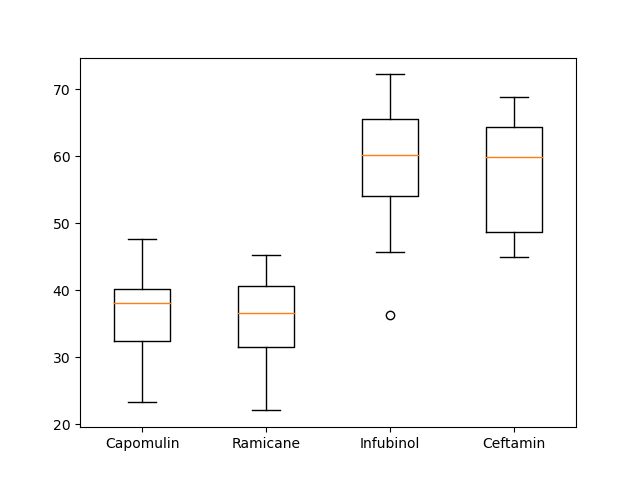

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#volumes = [tumor_volume]
#fig1, ax1 = plt.subplots()
#ax1.boxplot(volumes)
#plt.show()

plt.boxplot(tumor_volume, labels=treatments)
plt.show()

## Line and Scatter Plots

In [53]:
#time_volume = clean_df.groupby(["Timepoint", "Tumor Volume (mm3)"])
capomulin = pd.DataFrame(clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'])
s185_df = pd.DataFrame(capomulin.loc[capomulin['Mouse ID'] == "s185"])

s185_tumor_df = s185_df[["Timepoint", "Tumor Volume (mm3)"]]
s185_tumor_df = s185_tumor_df.reset_index()
s185_tumor_df.drop(labels="index",axis=1)

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


<IPython.core.display.Javascript object>


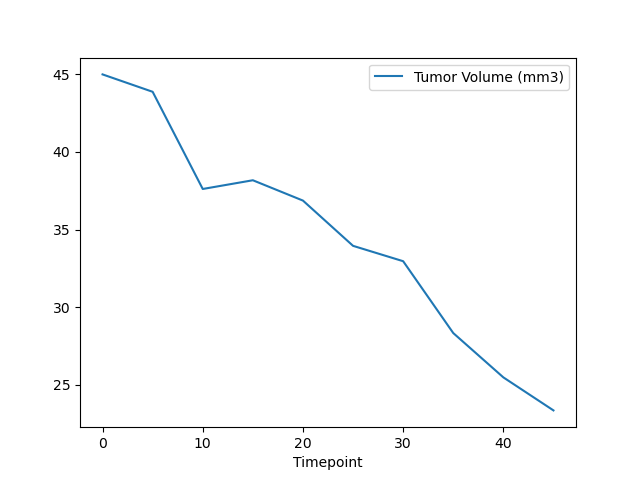

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_tumor_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


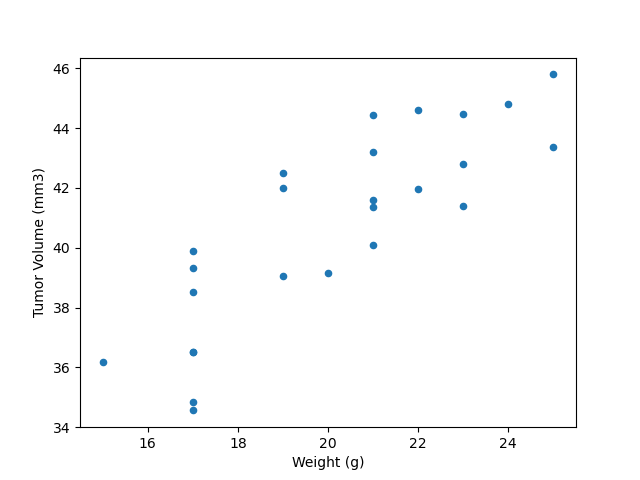

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_df = capomulin.groupby("Mouse ID").mean()
average_tumor_df
average_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

#plt.annotate(line_eq, (20, 15), fontsize=9, color="red")
plt.show()


## Correlation and Regression

In [111]:
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = average_tumor_df.loc[:,"Weight (g)"]
y_values = average_tumor_df.loc[:,"Tumor Volume (mm3)"]

#print(x_values)

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
print(line_eq)
print(rvalue)

y = 0.95x 21.55
0.8419363424694721


<IPython.core.display.Javascript object>


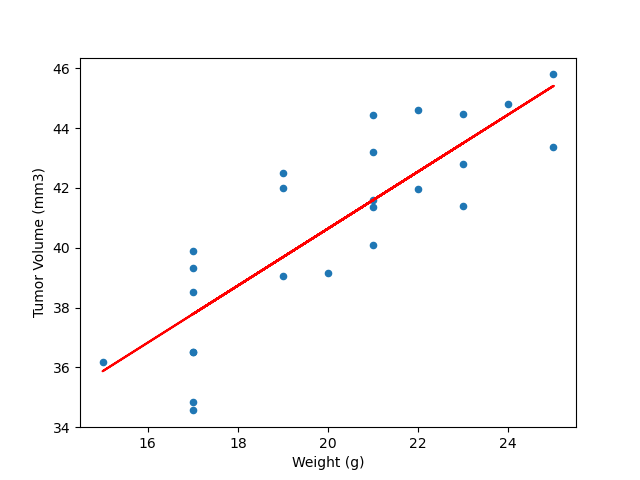

In [109]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
average_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.plot(x_values, regress_values , "r-")
#plt.annotate(line_eq, (20, 15), fontsize=9, color="red")
plt.show()
